In [35]:
# 1. 라이브러리 설치 (없으면 실행)
# !pip install shap

import pandas as pd
import numpy as np
import shap
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# 2. 데이터 로드 및 학습
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 (튜닝 없이 빠르게)
model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

print("✅ 모델 학습 완료! 이제 SHAP으로 뜯어봅시다.")

✅ 모델 학습 완료! 이제 SHAP으로 뜯어봅시다.


In [36]:
# 1. SHAP Explainer 생성 (트리 모델 전용 해석기)
explainer = shap.TreeExplainer(model)

# 2. SHAP 값 계산 (테스트 데이터에 대해)
shap_values = explainer.shap_values(X_test)

print(f"✅ SHAP 값 계산 완료: {shap_values.shape}")
# (데이터 개수, 특성 개수) 형태

✅ SHAP 값 계산 완료: (4128, 8)


C:\Users\sangh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\plots\_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
C:\Users\sangh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


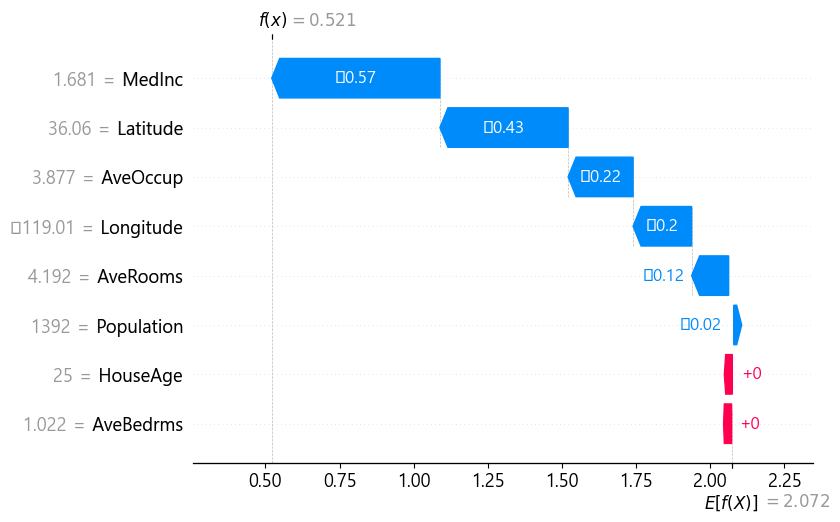

In [37]:
# Javascript 시각화 초기화 (주피터 노트북용)
shap.initjs()

# 첫 번째 데이터(X_test.iloc[0])에 대한 분석
# base_value: 모델의 평균 예측값 (기본 점수)
# f(x): 이 집의 최종 예측값
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))

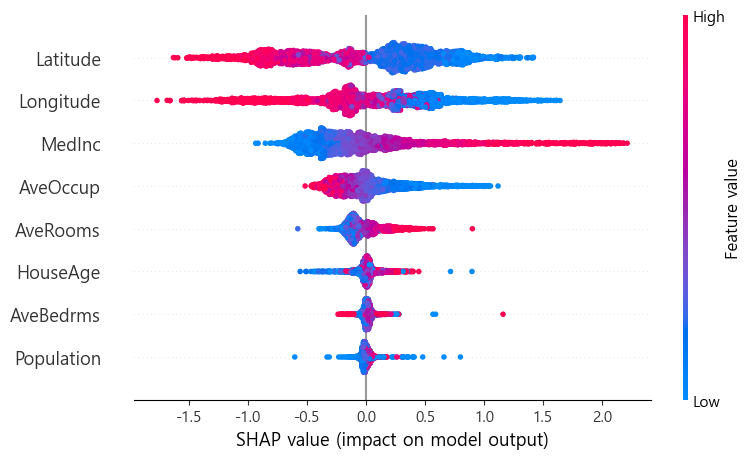

In [38]:
shap.summary_plot(shap_values, X_test)

오늘의 분석 시나리오:

목표: **"소비 패턴(식비, 교육비, 유흥비 등)"**을 보고, 그 동네의 **"월 평균 소득(부촌 여부)"**을 맞추는 AI를 만듭니다.

SHAP 질문:

1. AI는 어떤 지출 항목을 보고 소득이 높다고 판단했을까? (교육비? 유흥비?)

2. 특정 동네(예: 강남구 압구정동 vs 노원구 상계동)는 왜 소득 예측값이 다르게 나왔을까?

In [39]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    # 윈도우의 경우 'Malgun Gothic' (맑은 고딕) 설정
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    # 맥(Mac)의 경우 'AppleGothic' 설정
    rc('font', family='AppleGothic')

# 2. 마이너스 기호(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False

# Ensure your Korean font is set
plt.rc('font', family='Malgun Gothic')

# FIX: Tell matplotlib to use the standard hyphen for minus signs
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
import numpy as np
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


# 1. 데이터 로드 (한글 깨짐 방지: encoding='cp949' 또는 'euc-kr')
file_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\서울시 상권분석서비스(소득소비-행정동).csv"

df = pd.read_csv(file_path, encoding='cp949')

# 2. 데이터 확인
print(f"데이터 크기: {df.shape}")
print("컬럼 목록:", df.columns.tolist())

# 3. 필요한 데이터만 선택
# 타겟(y): 월_평균_소득_금액
# 특성(X): 식료품 ~ 기타_지출_총금액 (지출 관련 컬럼들)

# 지출 관련 컬럼만 자동으로 뽑기 ('지출_총금액'으로 끝나는 것들)
# 단, '지출_총금액' 자체는 정답과 너무 비슷할 수 있으므로 제외하거나 포함 여부 결정
# 여기서는 세부 항목(식료품, 의류 등)만 사용하여 예측해봅니다.

features = [col for col in df.column
            
            
            
            
            
            
            
            
            dds if '지출_총금액' in col and col != '지출_총금액']
target = '월_평균_소득_금액'

# X, y 데이터셋 생성
X = df[features]
y = df[target]

# 4. 학습/평가 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n학습 데이터: {X_train.shape}")
X_train.head()

데이터 크기: (11475, 16)
컬럼 목록: ['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액', '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액', '기타_지출_총금액', '음식_지출_총금액']

학습 데이터: (9180, 10)


,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
1731,649095000,40126000,105479000,378786000,85286000,301903000,42770000,264943000,211542000,639186000
3827,3328963000,211390000,577912000,3816475000,171609000,309727000,669789000,894656000,350637000,3159706000
7362,3087968000,2426411000,820319000,3347756000,536150000,269903000,618432000,5306237000,910893000,6209274000
11171,871676000,65310000,137939000,978227000,1219296000,146577000,363231000,331482000,112861000,1415000000
7589,2207932000,358998000,127504000,651417000,537102000,89006000,228142000,471417000,278112000,3366111000


In [41]:
model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"모델 설명력(R2): {score:.4f}")

모델 설명력(R2): 0.8699


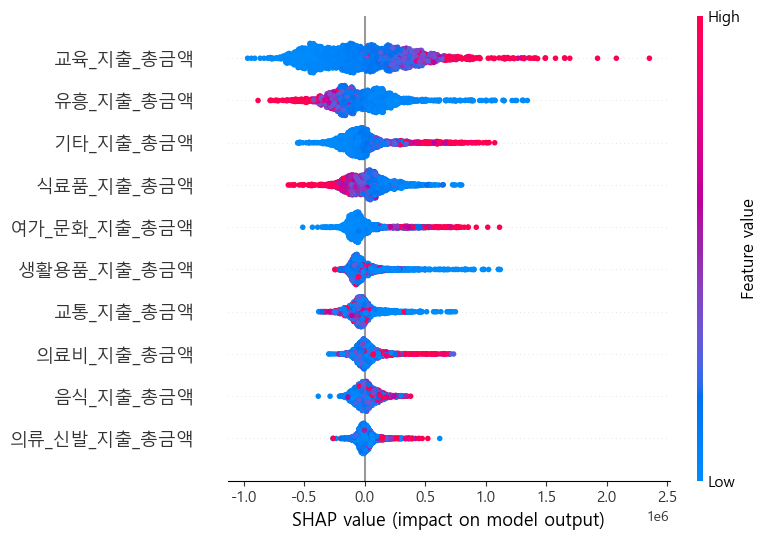

In [42]:
# 1. Explainer 생성
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 2. 전체 요약 차트 (Beeswarm)
shap.initjs()
shap.summary_plot(shap_values, X_test)

🔍 실전 해석
가장 위에 있는 항목을 예로 들어보겠습니다.

CASE A: 빨간 점들이 오른쪽에 뭉쳐 있다? (비례 관계)

뜻: "이 돈을 많이 쓸수록(Red), 소득이 높다(Right)."

예시: 보통 교육비나 의료비가 이런 패턴을 보입니다. (부자 동네일수록 지출이 큼)

CASE B: 빨간 점들이 왼쪽에 뭉쳐 있다? (반비례 관계)

뜻: "이 돈을 많이 쓸수록(Red), 오히려 소득은 낮다(Left)."

예시: 아까 보신 유흥비나, 혹은 식료품비(외식 말고 장보는 비용)가 이런 패턴일 수 있습니다. (지출이 커질수록 소득 수준은 낮게 평가됨)

지금 차트에서 가장 위에 있는 항목은 무엇인가요? 그게 바로 서울시의 부를 결정짓는 가장 강력한 요인입니다.

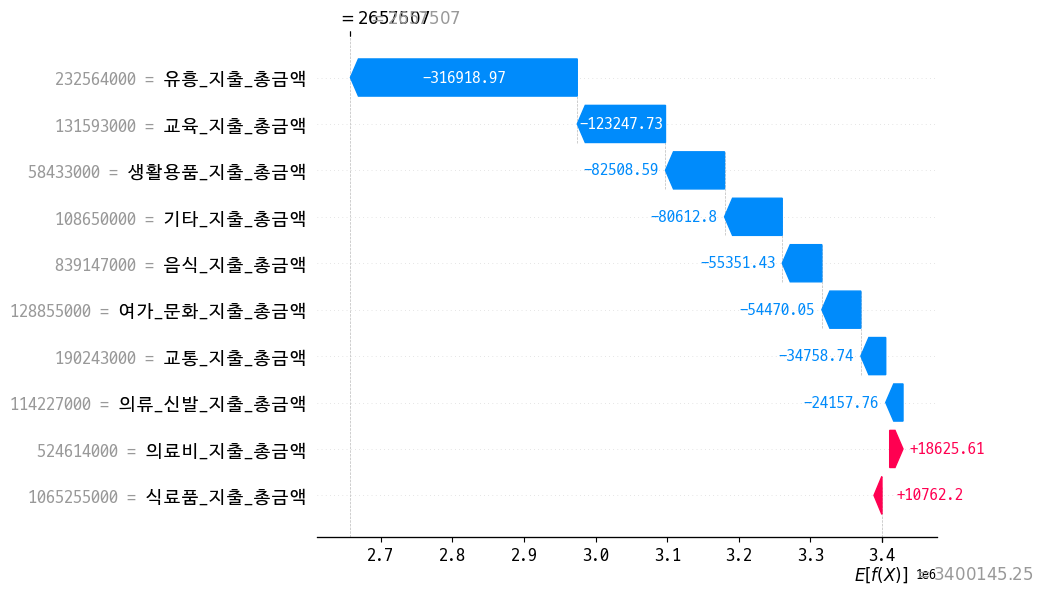

행정동: 독산3동
실제 소득: 2,493,680원
예측 소득: 2,657,507원


In [58]:
import matplotlib.pyplot as plt

plt.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False

# 테스트셋의 첫 번째 동네 분석
sample_idx = 0
shap.plots.waterfall(shap.Explanation(values=shap_values[sample_idx],                                     base_values=explainer.expected_value, 
data=X_test.iloc[sample_idx]))

# 실제 데이터 값 확인
print(f"행정동: {df.loc[X_test.index[sample_idx], '행정동_코드_명']}")
print(f"실제 소득: {y_test.iloc[sample_idx]:,.0f}원")
print(f"예측 소득: {model.predict(X_test.iloc[[sample_idx]])[0]:,.0f}원")

📍 행정동: 성현동
💰 실제 소득: 3,455,108원
🤖 예측 소득: 3,310,922원
------------------------------


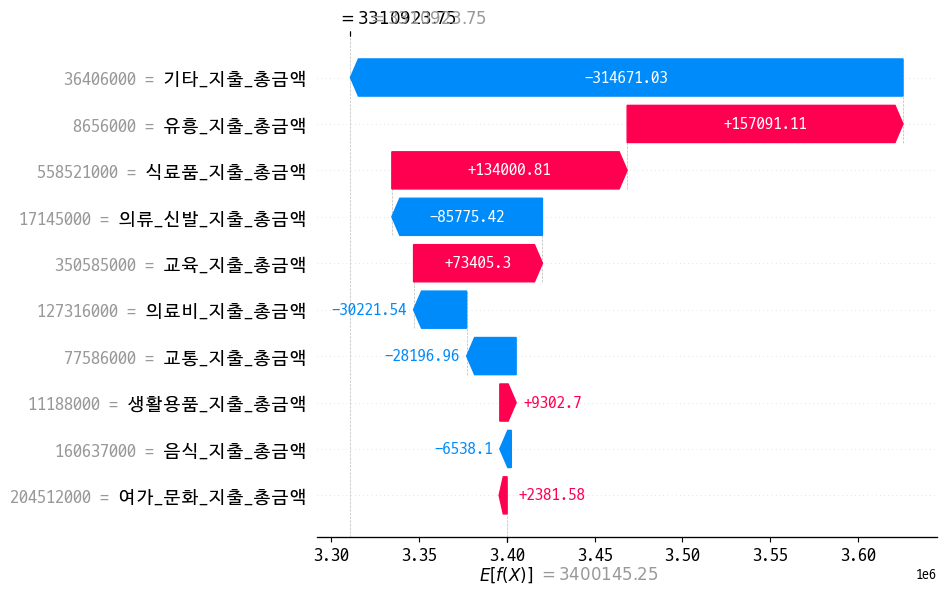

In [59]:
# 1. 성현동(11620565) 데이터 찾기
target_code = 11620565
target_row = df[df['행정동_코드'] == target_code]

if not target_row.empty:
    target_idx = target_row.index[0]
    dong_name = target_row.iloc[0]['행정동_코드_명']
    actual_income = y.loc[target_idx]

    pred_income = model.predict(X.loc[[target_idx]])[0]

    print(f"📍 행정동: {dong_name}")
    print(f"💰 실제 소득: {actual_income:,.0f}원")
    print(f"🤖 예측 소득: {pred_income:,.0f}원")
    print("-" * 30)

    shap.plots.waterfall(shap.Explanation(values=shap_values[X_test.index.get_loc(target_idx)], base_values=explainer.expected_value, data=X.loc[target_idx]))

else:
    print("해당 코드를 찾을 수 없습니다.")